# Part 1 summary project

You work in the online store, which sells computer games all over the world. Historical data on game sales, user and expert ratings, genres and platforms (for example, Xbox or PlayStation) are available from open sources. You need to identify patterns that determine the success of the game. This will allow you to place a bet on a potentially popular product and plan advertising campaigns.

Here is data up to 2016. Let's say it's December 2016 and you're planning a campaign for 2017. It is necessary to work out the principle of working with data. It doesn't matter whether you forecast sales for 2017 based on 2016 data or 2027 sales based on 2026 data.

The data set contains the abbreviation ESRB (Entertainment Software Rating Board) - this is an association that determines the age rating of computer games. The ESRB evaluates game content and assigns it an appropriate age rating, such as Mature, Young Children, or Teen.

### Open the data file and review the general information

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data=pd.read_csv('games.csv')
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Conclusion**
1. Too many gaps in Critic_score, User_score and Rating.
2. You need to change the data type in User_score, year_of_release
3. It is necessary to replace tbd in the User_score column with NaN

### Подготовка данных

In [4]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
data=data.dropna(subset=['year_of_release', 'name', 'genre'])
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)
data=data.astype({"year_of_release":"int", "user_score":"float"})
len(data)- len(data. drop_duplicates())

0

1. The term tbd means 'to be dertemined' - "will be determined." The user rating is the average rating of many players. For a new game this all takes time. We cannot determine this estimate, so we change 'tbd' to 'Nan'
2. Using the drop_duplicates method, we check for obvious duplicates. These were not found in our database.

In [6]:
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


When checking for implicit duplicates, the game Madden NFL 13 was found to appear twice. You can combine these lines by deleting the second one.

In [7]:
data.loc[604,'eu_sales']=data.loc[604,'eu_sales']+data.loc[16230,'eu_sales']
data.loc[604]

name               Madden NFL 13
platform                     PS3
year_of_release             2012
genre                     Sports
na_sales                    2.11
eu_sales                    0.23
jp_sales                     0.0
other_sales                 0.23
critic_score                83.0
user_score                   5.5
rating                         E
Name: 604, dtype: object

In [8]:
data=data.drop(index=16230)
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Duplicate removed

In [9]:
data[data[['name', 'platform']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T


I also found the game NFS: Most Wanted, which is listed twice: 2005 and 2012. But after searching on the Internet, I found out that this is the remake of the game, so they cannot be combined.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


1. Removed rows with missing data in year_of_release, name and genre, because their share is less than 2% and cannot be restored.
2. The gaps in the critic_score and user_score columns cannot be filled in, because each game has its own genre, year of release, sales, and it is impossible to project a median or average score.
3. The rating of games also cannot be restored, since this indicator is determined by the ESRB

In [11]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
548,Tekken 6,PS3,2009,Fighting,1.20,0.97,0.17,0.42,79.0,7.4,T,2.76
4660,Condemned: Criminal Origins,X360,2005,Action,0.36,0.02,0.00,0.03,81.0,8.2,M,0.41
4985,FIFA 14,Wii,2013,Sports,0.00,0.36,0.00,0.02,NaN,4.3,E,0.38
16436,Grooverider: Slot Car Thunder,GC,2003,Racing,0.01,0.00,0.00,0.00,49.0,NaN,E,0.01
1883,The Godfather,PS2,2006,Action,0.89,0.03,0.01,0.15,75.0,8.3,M,1.08
6372,Scooby-Doo! and the Spooky Swamp,PS2,2010,Action,0.08,0.11,0.00,0.08,NaN,NaN,NaN,0.27
5625,Karaoke Revolution Volume 3,PS2,2004,Misc,0.16,0.12,0.00,0.04,82.0,7.8,E,0.32
2031,LEGO Indiana Jones 2: The Adventure Continues,X360,2009,Action,0.62,0.31,0.00,0.09,71.0,7.4,E10+,1.02
7539,Zombie Army Trilogy,PS4,2015,Shooter,0.05,0.12,0.00,0.03,62.0,6.8,NaN,0.20
11934,All-Star Baseball 2004,GBA,2003,Sports,0.05,0.02,0.00,0.00,NaN,NaN,NaN,0.07


**Conclusion**
1. We removed rows with missing data in year_of_release, name and genre, because their share is less than 2% and they are difficult to recover.
2. Changed the column names to lower case (for ease of use).
3. Changed data types and replaced tbd with Nan.
4. Added total sales of each game to the table.
5. Removed implicit duplicates

### Data analysis

**1. Annual sales**

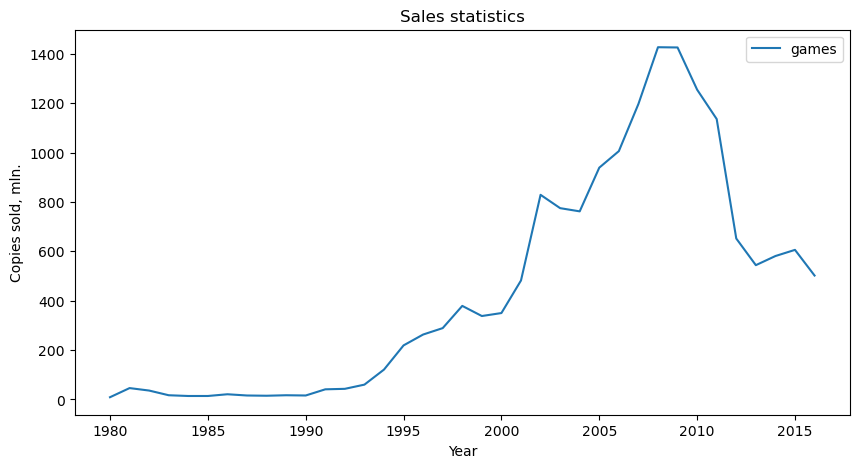

,games
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


In [12]:
yearly_release_table=pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count')
yearly_release_table.columns = ['games']
yearly_release_table.plot(figsize=(10, 5))
plt.title('Sales statistics')
plt.xlabel('Year')
plt.ylabel('Copies sold, mln.')
plt.show()
yearly_release_table

**Conclusion**

We see rapid growth that began in the second half of the 90s, reaching its peak in 2008-2009, and then falling to the level of 2000.

**2. Most popular gaming platforms**

<Axes: title={'center': 'Most popular gaming platforms'}, xlabel='platform'>

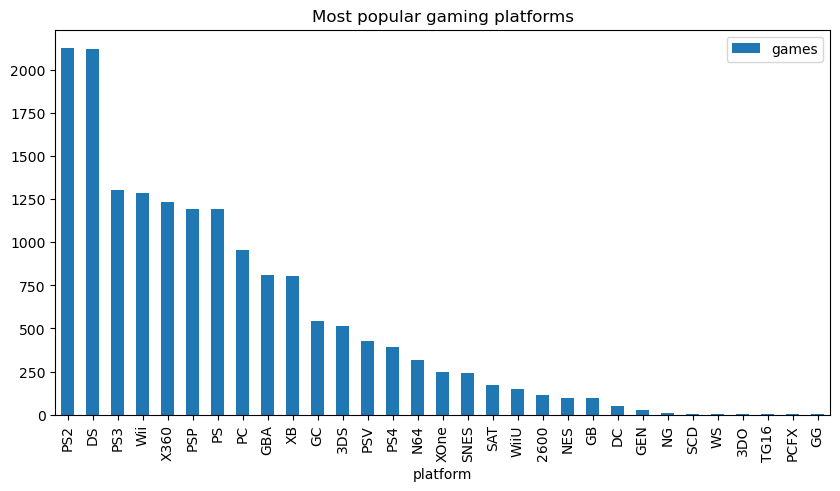

In [13]:
platform_release_table=pd.pivot_table(data, index='platform', values='name', aggfunc='count').sort_values(by='name', ascending=False)
platform_release_table.columns = ['games']
platform_release_table.plot(kind='bar', figsize=(10, 5), title='Most popular gaming platforms')

In [14]:
data[(data['platform']=='DS')&(data['year_of_release']==1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


In [15]:
data.loc[15957,'year_of_release']=2005

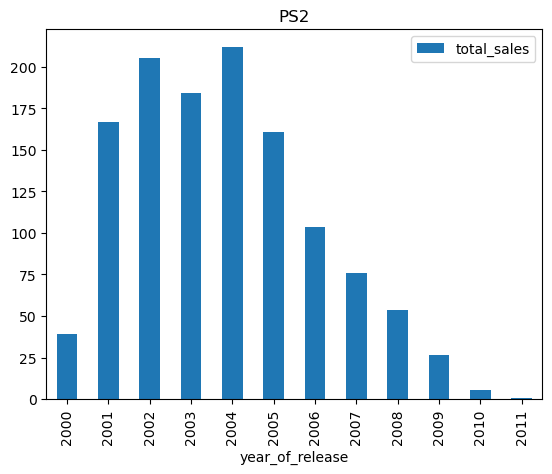

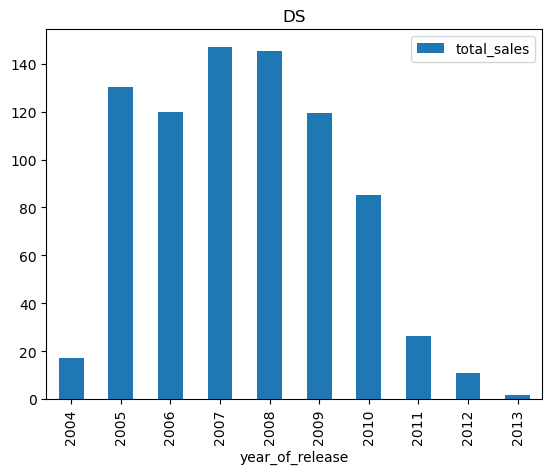

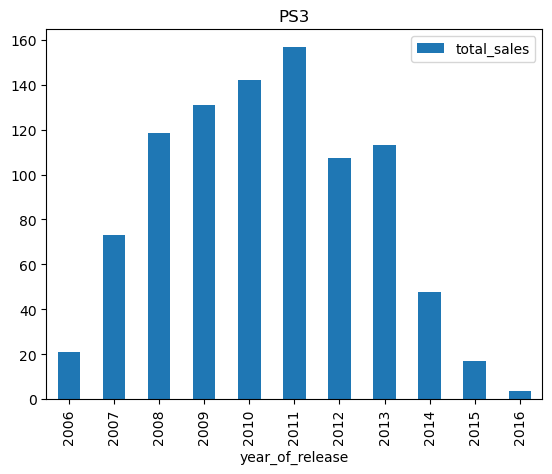

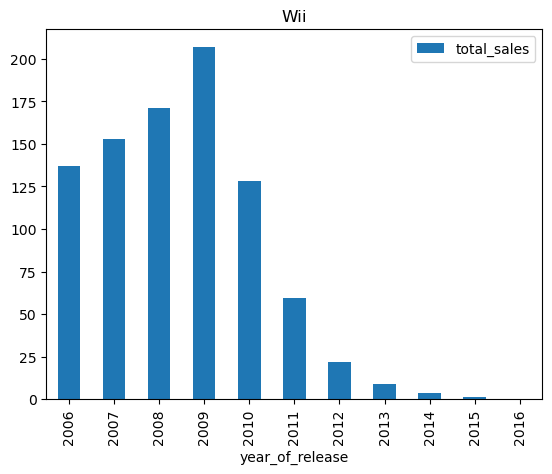

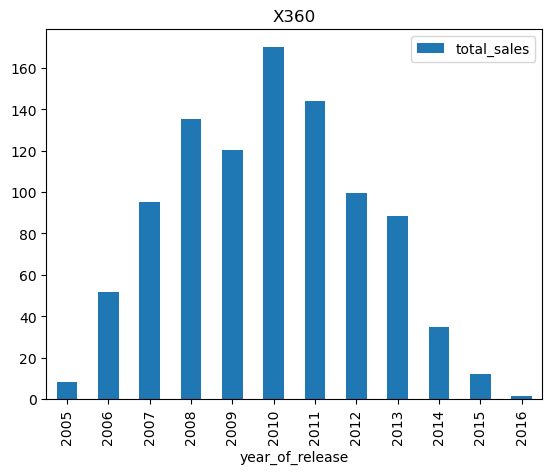

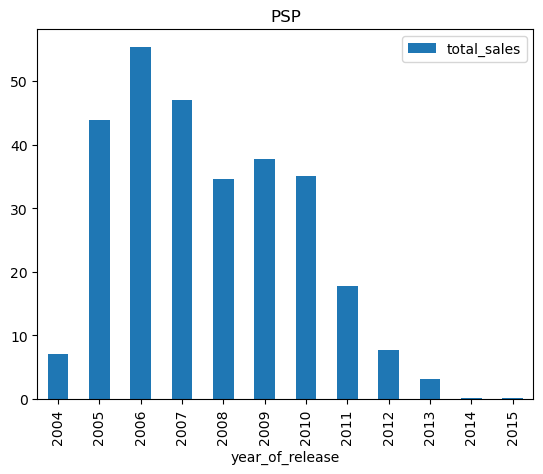

In [16]:
platforms =['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP']

for platform in platforms:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar')
    plt.title(platform)

**Conclusion**

1. The average lifespan of the gaming platform is approximately 7-8 years, with maximum sales in the 4th year, after the release.
2. The sales record is held by the PS2, although people stopped buying games for it back in 2011. The PS3 was unable to repeat the successes of its predecessor, losing twice as much.

**3. Current data**

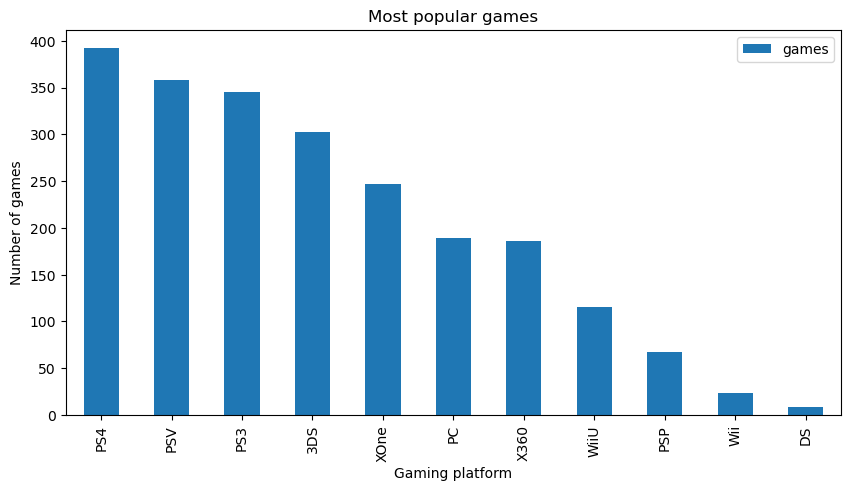

In [17]:
actual_data=data.query("year_of_release>2012")
actual_platform_release_table=pd.pivot_table(actual_data, index='platform', values='name', aggfunc='count').sort_values(by='name', ascending=False)
actual_platform_release_table.columns = ['games']
actual_platform_release_table.plot(kind='bar', figsize=(10, 5), title='Most popular games')
plt.xlabel('Gaming platform')
plt.ylabel('Number of games')
plt.show()

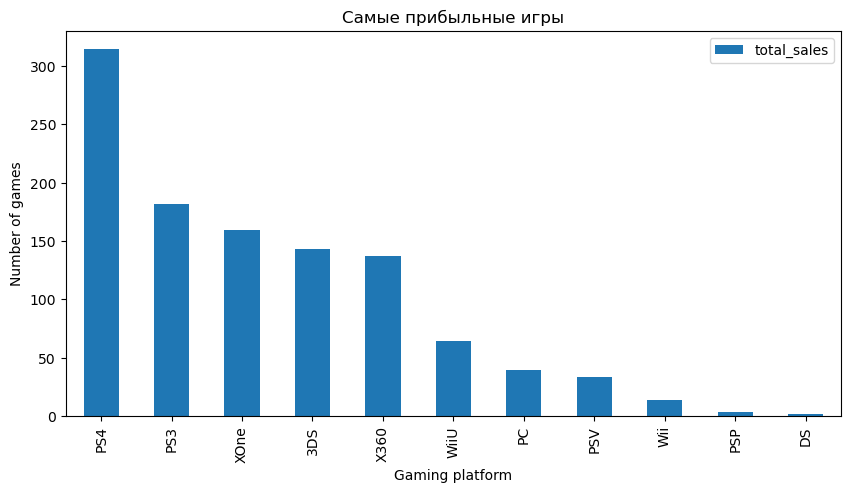

In [18]:
actual_platform_revenue_table=pd.pivot_table(actual_data, index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
actual_platform_revenue_table.plot(kind='bar', figsize=(10, 5), title='Самые прибыльные игры').plot(kind='bar', figsize=(10, 5), title='The most profitable games')
plt.xlabel('Gaming platform')
plt.ylabel('Number of games')
plt.show()

**Conclusion**

1. The current period will be considered from 2013 to this year (2016). During this period, sales of games for the outdated PS2 and DS had already ended, and modern platforms PS4 and PS3 entered the market.
2. The graphs for the number of games released and copies sold are similar to each other, except for one thing: the profitability per PS4 game is 2 times higher than that of its competitors. This may be due to a change in Sony's pricing policy for games on the new platform.

**4. Box plot**

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: total_sales, dtype: float64

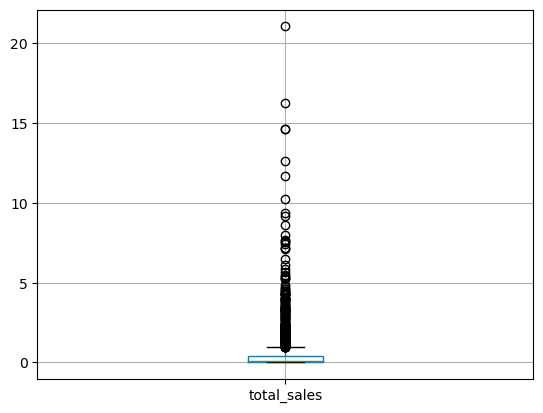

In [19]:
actual_data.boxplot(column='total_sales')
actual_data['total_sales'].describe()

In [20]:
top5 = ['PS4','PS3','XOne','3DS','X360']
top_5_platforms = actual_data[actual_data['platform'].isin(top5)]
top_5_platforms['total_sales'].describe()

count    1473.000000
mean        0.634718
std         1.454708
min         0.010000
25%         0.050000
50%         0.170000
75%         0.580000
max        21.050000
Name: total_sales, dtype: float64

In [21]:
top_5_platforms.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.04,0.090,0.280,14.60
PS3,345.0,0.525884,1.451939,0.01,0.04,0.150,0.510,21.05
PS4,392.0,0.801378,1.609456,0.01,0.06,0.200,0.730,14.63
X360,186.0,0.735484,1.663275,0.01,0.08,0.265,0.795,16.27
XOne,247.0,0.645020,1.036139,0.01,0.06,0.220,0.685,7.39


Text(0.5, 0, 'Global sales')

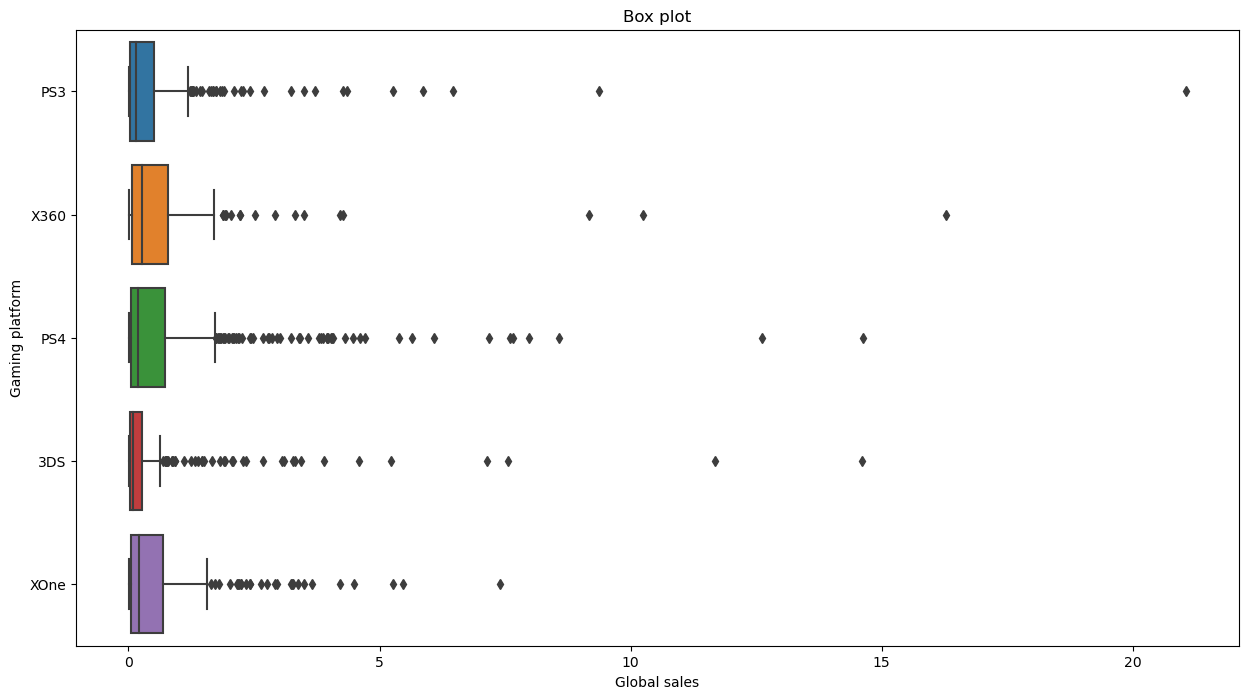

In [22]:
plt.figure(figsize=(15,8))
sns.boxplot(data=top_5_platforms, y='platform', x='total_sales')
plt.title('Box plot')
plt.ylabel('Gaming platform')
plt.xlabel('Global sales')

Text(0.5, 0, 'Global sales')

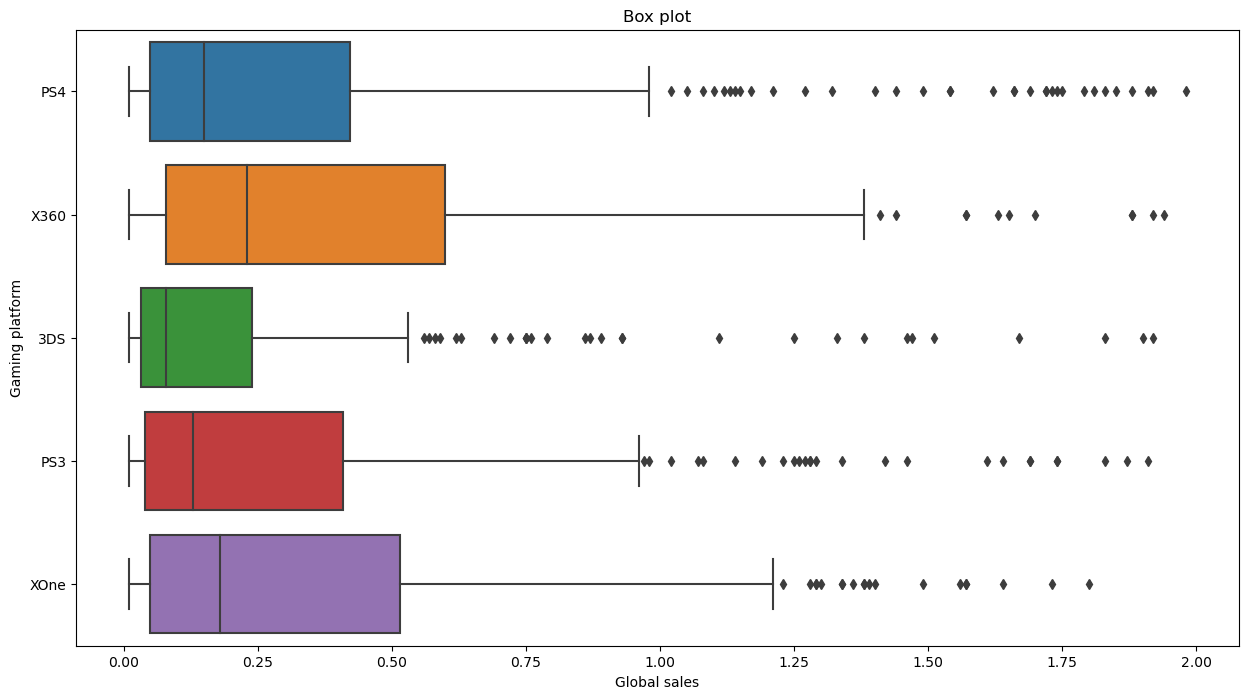

In [23]:
top_5_platforms_clean=top_5_platforms[top_5_platforms['total_sales']<2]
plt.figure(figsize=(15,8))
sns.boxplot(data=top_5_platforms_clean, y='platform', x='total_sales')
plt.title('Box plot')
plt.ylabel('Gaming platform')
plt.xlabel('Global sales')

In [24]:
for platform in top5: 
    top=top_5_platforms[top_5_platforms['platform']==platform]
    record=top[top['total_sales']==top['total_sales'].max()]
    print (record)
    print('\n')

                         name platform  year_of_release    genre  na_sales  \
31  Call of Duty: Black Ops 3      PS4             2015  Shooter      6.03   

    eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
31      5.86      0.36         2.38           NaN         NaN    NaN   

    total_sales  
31        14.63  


                  name platform  year_of_release   genre  na_sales  eu_sales  \
16  Grand Theft Auto V      PS3             2013  Action      7.02      9.09   

    jp_sales  other_sales  critic_score  user_score rating  total_sales  
16      0.98         3.96          97.0         8.2      M        21.05  


                         name platform  year_of_release    genre  na_sales  \
99  Call of Duty: Black Ops 3     XOne             2015  Shooter      4.59   

    eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
99      2.11      0.01         0.68           NaN         NaN    NaN   

    total_sales  
99         7.39  


         

**Conclusion**

Having gotten rid of outliers, we see that, per game, games on the X360 sell best, followed by PS4 and Xbox One. PS3 and PS4 close the ranking.
This can be attributed to the generally unsuccessful generation of the PS3 (compared to the PS2), as well as the novelty of the new generation of consoles: PS4 and Xbox One.

The best-selling game is GTA V with 21 million copies sold. Among the most popular consoles, GTA V and Call of Duty: Black Ops 3 are found twice each, and on 3DS the leaders are Pokemon X/Pokemon Y.
This is understandable because the 3DS is popular in the Japanese market, and the role-playing genre is in demand only in this market. In North America and Europe, the leaders are games in the action and shooter genres

**5. Impact of user and critic reviews on game sales**

**PS4**

0.40656790206178123


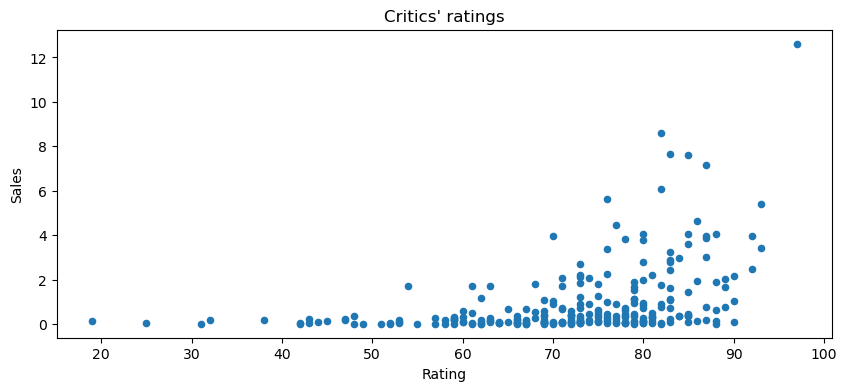

In [25]:
ps4=actual_data[actual_data['platform']=='PS4']
print(ps4['critic_score'].corr(ps4['total_sales']))
ps4.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10, 4))
plt.title("Critics' ratings")
plt.xlabel("Rating")
plt.ylabel("Sales")
plt.show()

-0.03195711020455644


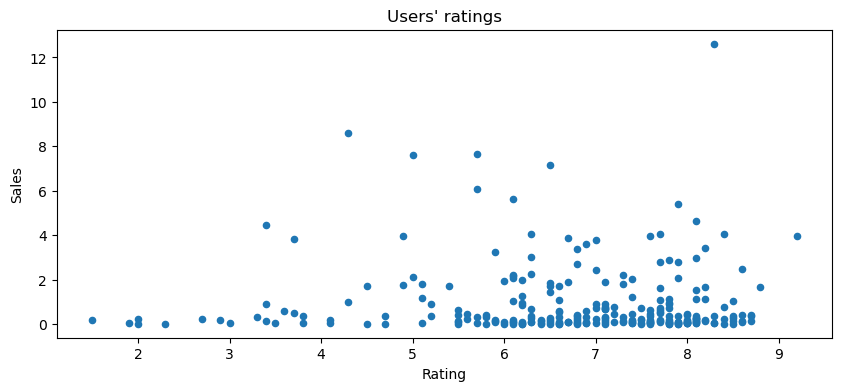

In [26]:
ps4=actual_data[actual_data['platform']=='PS4']
print(ps4['user_score'].corr(ps4['total_sales']))
ps4.plot(x='user_score', y='total_sales', kind='scatter', figsize=(10, 4))
plt.title("Users' ratings")
plt.xlabel("Rating")
plt.ylabel("Sales")
plt.show()

**X360**

0.35034454602286647


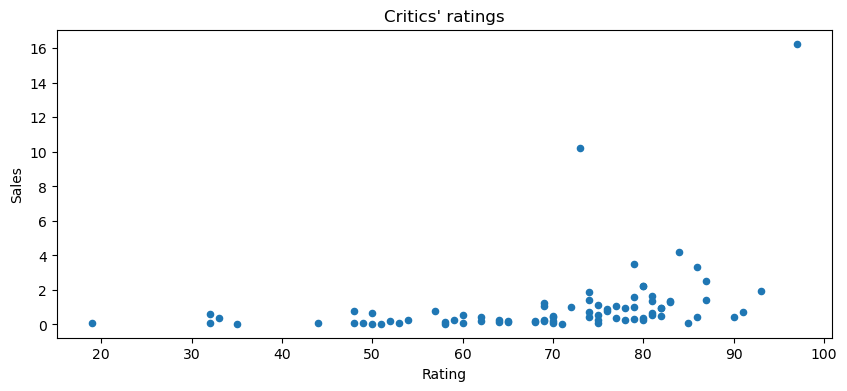

In [27]:
x360=actual_data[actual_data['platform']=='X360']
print(x360['critic_score'].corr(x360['total_sales']))
x360.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10, 4))
plt.title("Critics' ratings")
plt.xlabel("Rating")
plt.ylabel("Sales")
plt.show()

-0.011742185147181334


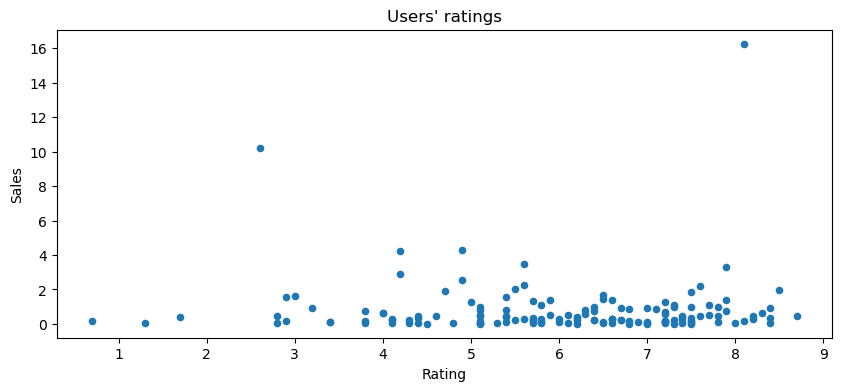

In [28]:
x360=actual_data[actual_data['platform']=='X360']
print(x360['user_score'].corr(x360['total_sales']))
x360.plot(x='user_score', y='total_sales', kind='scatter', figsize=(10, 4))
plt.title("Users' ratings")
plt.xlabel("Rating")
plt.ylabel("Sales")
plt.show()

**3DS**

0.3570566142288104


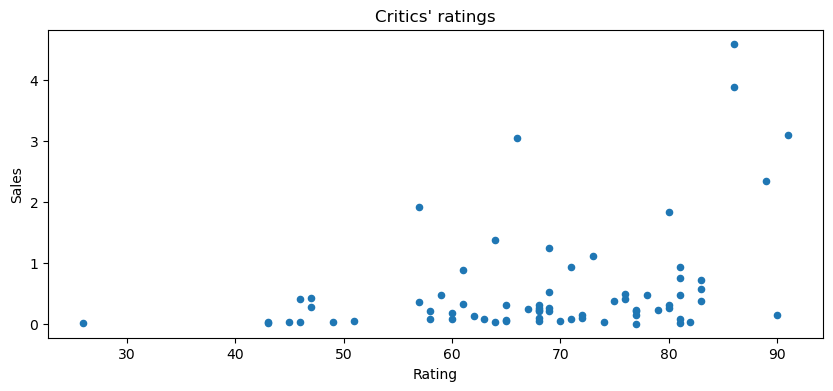

In [29]:
ds3=actual_data[actual_data['platform']=='3DS']
print(ds3['critic_score'].corr(ds3['total_sales']))
ds3.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10, 4))
plt.title("Critics' ratings")
plt.xlabel("Rating")
plt.ylabel("Sales")
plt.show()

0.24150411773563005


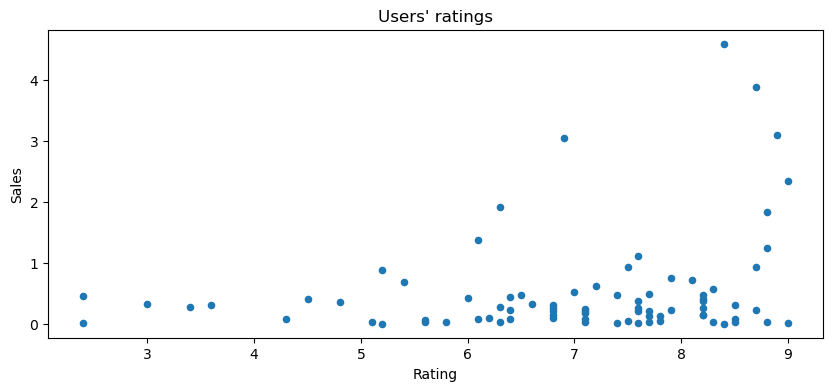

In [30]:
ds3=actual_data[actual_data['platform']=='3DS']
print(ds3['user_score'].corr(ds3['total_sales']))
ds3.plot(x='user_score', y='total_sales', kind='scatter', figsize=(10, 4))
plt.title("Users' ratings")
plt.xlabel("Rating")
plt.ylabel("Sales")
plt.show()

**PS3**

0.33428533933719184


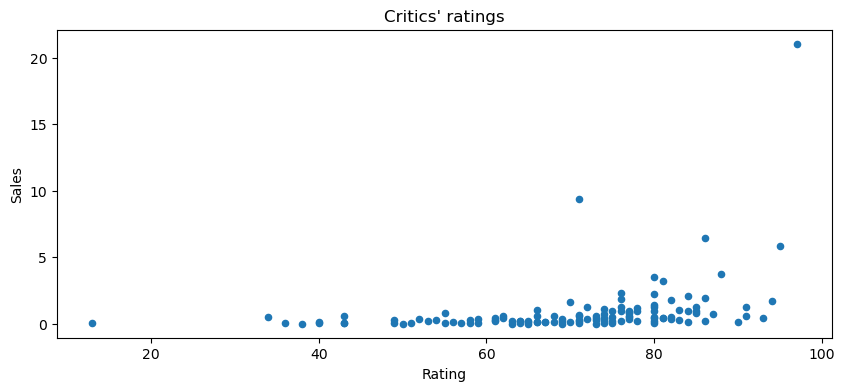

In [31]:
ps3=actual_data[actual_data['platform']=='PS3']
print(ps3['critic_score'].corr(ps3['total_sales']))
ps3.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10, 4))
plt.title("Critics' ratings")
plt.xlabel("Rating")
plt.ylabel("Sales")
plt.show()

0.0023944027357567033


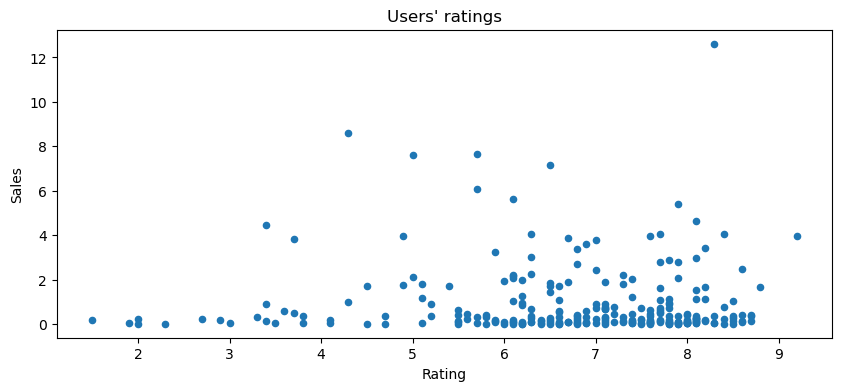

In [32]:
ps3=actual_data[actual_data['platform']=='PS3']
print(ps3['user_score'].corr(ps3['total_sales']))
ps4.plot(x='user_score', y='total_sales', kind='scatter', figsize=(10, 4))
plt.title("Users' ratings")
plt.xlabel("Rating")
plt.ylabel("Sales")
plt.show()

**Xbox One**

0.41699832800840153


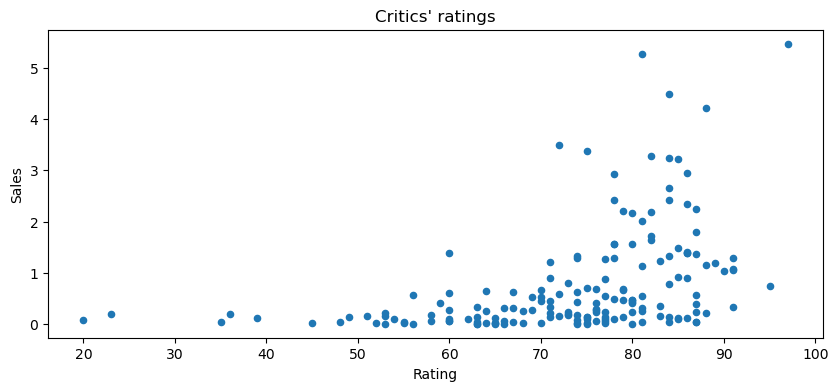

In [33]:
xbox_one=actual_data[actual_data['platform']=='XOne']
print(xbox_one['critic_score'].corr(xbox_one['total_sales']))
xbox_one.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10, 4))
plt.title("Critics' ratings")
plt.xlabel("Rating")
plt.ylabel("Sales")
plt.show()

-0.06892505328279418


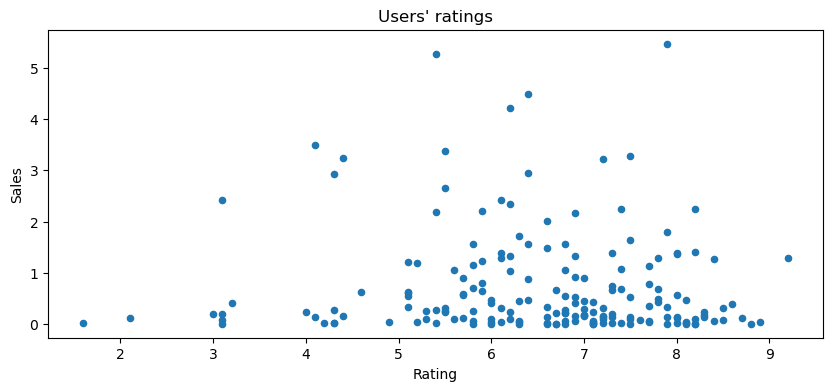

In [34]:
xbox_one=actual_data[actual_data['platform']=='XOne']
print(xbox_one['user_score'].corr(xbox_one['total_sales']))
xbox_one.plot(x='user_score', y='total_sales', kind='scatter', figsize=(10, 4))
plt.title("Users' ratings")
plt.xlabel("Rating")
plt.ylabel("Sales")
plt.show()

**Conclusion**

1. For platforms, the correlation between expert ratings and sales is moderate
2. User ratings have virtually no impact on game sales.

**6. Distribution of games by genre**

In [35]:
genre_top_sales=top_5_platforms.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)
genre_top_sales

,total_sales
genre,
Action,285.96
Shooter,216.22
Sports,142.48
Role-Playing,127.83
Misc,43.57
Racing,31.46
Fighting,27.91
Platform,22.88
Adventure,18.59


In [36]:
top_5_platforms_clean.groupby('genre')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,490.0,0.292959,0.391227,0.01,0.0400,0.120,0.3775,1.88
Adventure,110.0,0.169000,0.301288,0.01,0.0200,0.060,0.1475,1.66
Fighting,61.0,0.288197,0.358815,0.01,0.0700,0.130,0.3300,1.38
Misc,94.0,0.234468,0.299392,0.01,0.0400,0.115,0.3175,1.92
Platform,47.0,0.486809,0.580600,0.01,0.0950,0.240,0.5850,1.91
Puzzle,11.0,0.162727,0.237154,0.01,0.0350,0.070,0.1100,0.76
Racing,60.0,0.359000,0.472594,0.01,0.0575,0.170,0.4150,1.98
Role-Playing,171.0,0.348538,0.446373,0.01,0.0600,0.160,0.4650,1.91
Shooter,111.0,0.552703,0.535688,0.01,0.1200,0.350,0.7650,1.94


Text(0.5, 0, 'Global sales')

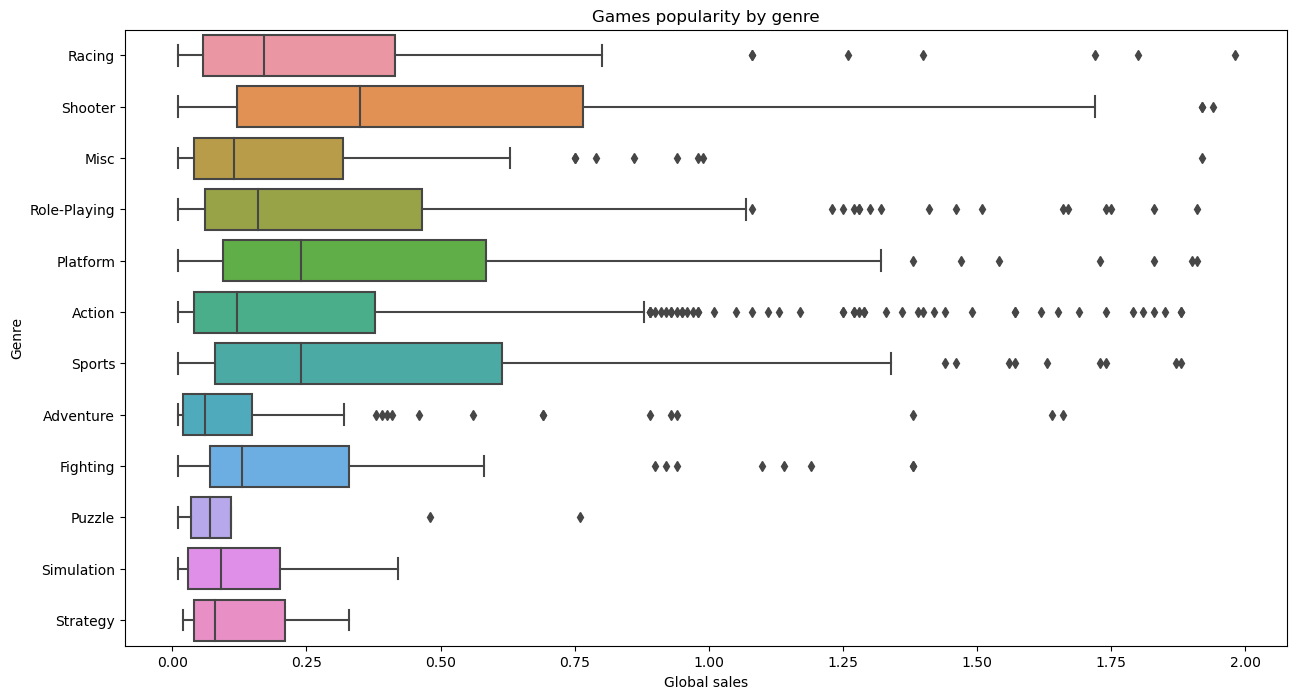

In [37]:
plt.figure(figsize=(15,8))
sns.boxplot(data=top_5_platforms_clean, y='genre', x='total_sales')
plt.title('Games popularity by genre')
plt.ylabel('Genre')
plt.xlabel('Global sales')

**Conclusion**

Thanks to boxplot, we note that the median sales of one shooter game are almost twice as high as action games, where overall sales are higher. There are too many games released in the action genre (490), and not enough shooters (111).

The standout games are 'platform' and fighting with a high median.

The adventure, puzzle and strategy genres have very poor performance. Few games in these genres are released, and each of them, in general, sells poorly.

### User portrait

**1. Most popular platforms**

In [38]:
na_profile=actual_data.query('na_sales>0')
eu_profile=actual_data.query('eu_sales>0')
jp_profile=actual_data.query('jp_sales>0')

In [39]:
na_profile_platform=pd.pivot_table(na_profile, index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', \
                                                                                                              ascending=False)
na_profile_platform=na_profile_platform.head()
na_profile_platform

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


<Axes: title={'center': 'Most popular platfroms in North America'}, ylabel='na_sales'>

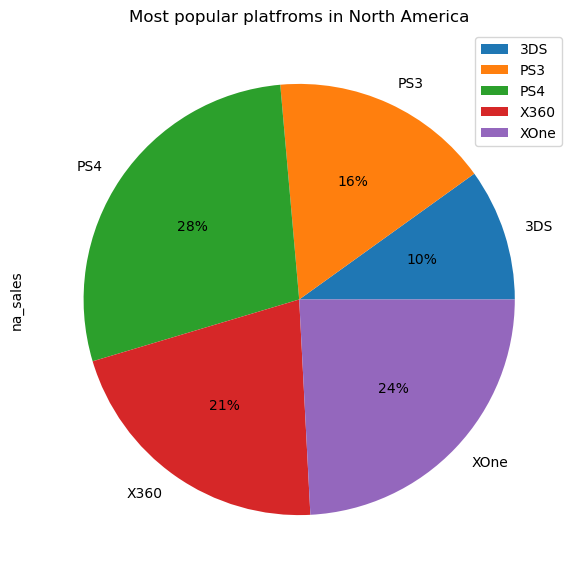

In [40]:
na_profile_platform.groupby(['platform']).sum().plot(kind='pie', y='na_sales', autopct='%1.0f%%', figsize=(7,7), \
                                                     title='Most popular platfroms in North America')

**Conclusion**

The North American market was divided between Sony (PS4 and PS3) and Microsoft (Xbox 360 and Xbox One) in almost equal parts (44% and 45%, respectively). Nintendo (3DS) has only 10% of the market.

In [41]:
eu_profile_platform=pd.pivot_table(eu_profile, index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales',\
                                                                                                              ascending=False)
eu_profile_platform=eu_profile_platform.head()
eu_profile_platform

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


<Axes: title={'center': 'Most popular platforms in Europe'}, ylabel='eu_sales'>

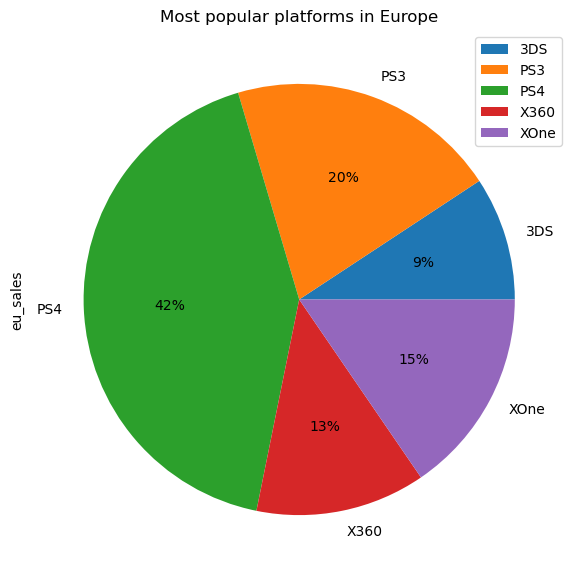

In [42]:
eu_profile_platform.groupby(['platform']).sum().plot(kind='pie', y='eu_sales', autopct='%1.0f%%', figsize=(7,7), \
                                                     title='Most popular platforms in Europe')

**Conclusion**

62% of sales in Europe come from Sony, Microsoft has half that, 28%. Nintendo again holds 10% of the market.

In [43]:
jp_profile_platform=pd.pivot_table(jp_profile, index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales',\
                                                                                                              ascending=False)
jp_profile_platform=jp_profile_platform.head()
jp_profile_platform

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


<Axes: title={'center': 'Most popular platforms in Japan'}, ylabel='jp_sales'>

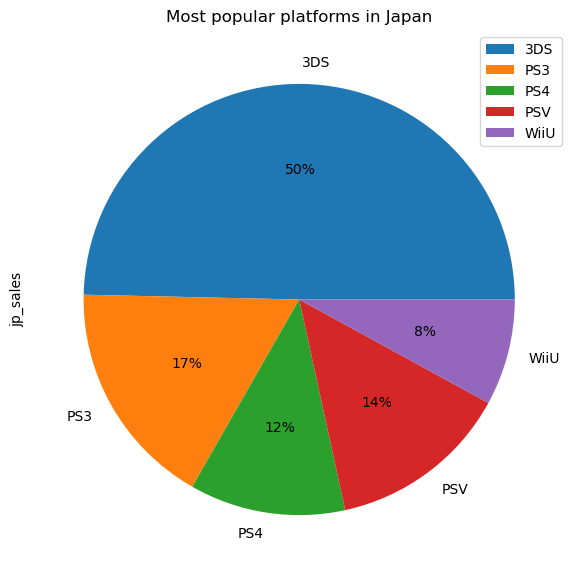

In [44]:
jp_profile_platform.groupby(['platform']).sum().plot(kind='pie', y='jp_sales', autopct='%1.0f%%', figsize=(7,7), \
                                                     title='Most popular platforms in Japan')

**Conclusion**

In Japan the picture is changing dramatically. In the home market, Nintendo holds 58%, with Sony taking the rest.

**2. Most Popular Genres**

In [45]:
na_profile_genre=pd.pivot_table(na_profile, index='genre', values='na_sales', aggfunc='count').sort_values('na_sales', \
                                                                                                              ascending=False)
na_profile_genre=na_profile_genre.head()
na_profile_genre

,na_sales
genre,
Action,442
Shooter,171
Role-Playing,158
Sports,143
Misc,84


Text(0, 0.5, '')

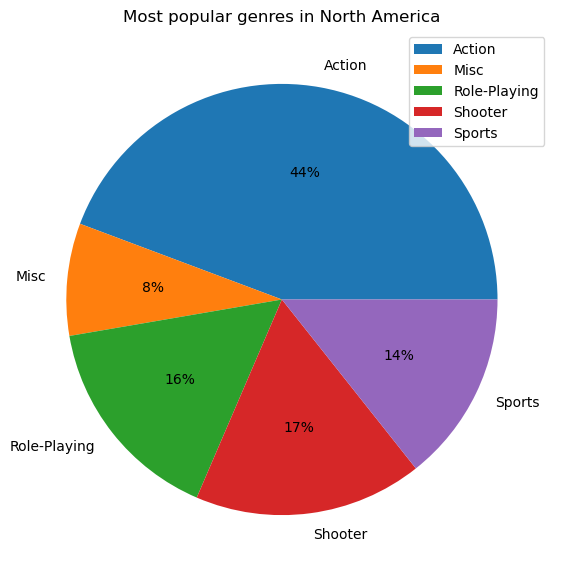

In [46]:
na_profile_genre.groupby(['genre']).sum().plot(kind='pie', y='na_sales', autopct='%1.0f%%', figsize=(7,7), \
                                                     title='Most popular genres in North America')
plt.ylabel('')

In [47]:
eu_profile_genre=pd.pivot_table(eu_profile, index='genre', values='eu_sales', aggfunc='count').sort_values('eu_sales', \
                                                                                                              ascending=False)
eu_profile_genre=eu_profile_genre.head()
eu_profile_genre

,eu_sales
genre,
Action,494
Shooter,171
Sports,169
Role-Playing,155
Misc,80


Text(0, 0.5, '')

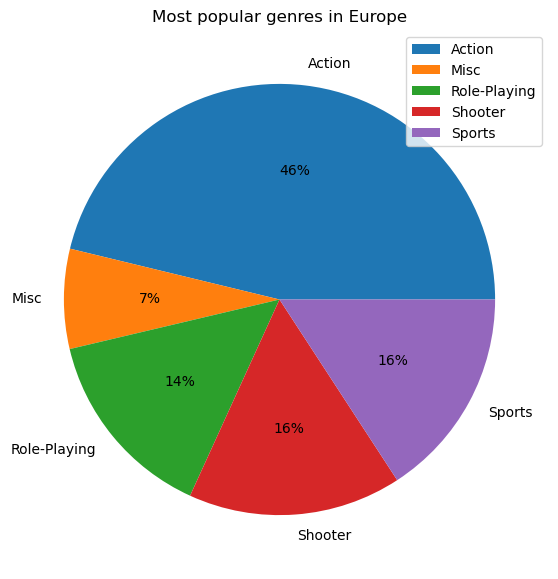

In [48]:
eu_profile_genre.groupby(['genre']).sum().plot(kind='pie', y='eu_sales', autopct='%1.0f%%', figsize=(7, 7), \
                                                     title='Most popular genres in Europe')
plt.ylabel('')

**Conclusion**

North America and Europe have similar preferences: half of users buy games in the Action genre. Sports, Shooter and Role-playing genres have similar shares (~16%)

In [49]:
jp_profile_genre=pd.pivot_table(jp_profile, index='genre', values='jp_sales', aggfunc='count').sort_values('jp_sales', \
                                                                                                              ascending=False)
jp_profile_genre=jp_profile_genre.head()
jp_profile_genre

,jp_sales
genre,
Action,400
Role-Playing,236
Adventure,165
Misc,90
Shooter,69


Text(0, 0.5, '')

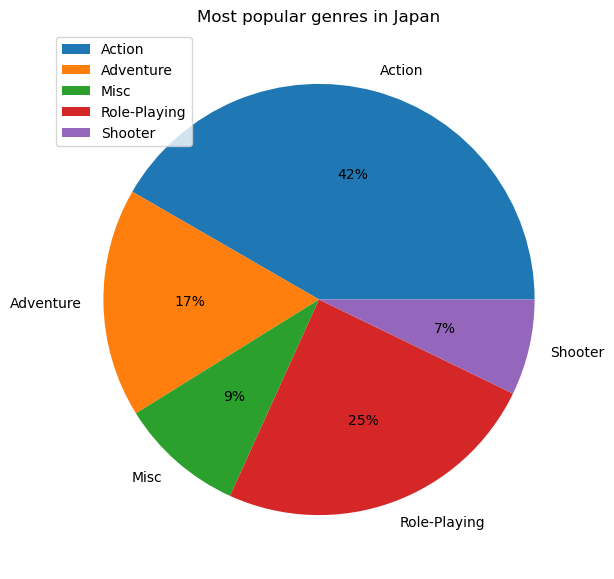

In [50]:
jp_profile_genre.groupby(['genre']).sum().plot(kind='pie', y='jp_sales', autopct='%1.0f%%', figsize=(7, 7), \
                                                     title='Most popular genres in Japan')
plt.ylabel('')

**Conclusion**

In Japan, Action genre leads. A quarter of users choose Role-playing, and 17% choose Adventure games, which are popular only in this region.

**3. Impact of ESRB Rating**

In [51]:
actual_data['rating'].unique()

array(['M', nan, 'E', 'T', 'E10+'], dtype=object)

In [52]:
na_rating=pd.pivot_table(na_profile, index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales',\
                                                                                                   ascending=False)
na_rating

,na_sales
rating,
M,165.21
E,79.05
E10+,54.24
T,49.79


In [53]:
eu_rating=pd.pivot_table(eu_profile, index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',\
                                                                                                   ascending=False)
eu_rating

,eu_sales
rating,
M,145.32
E,83.36
E10+,42.69
T,41.95


In [54]:
jp_rating=pd.pivot_table(jp_profile, index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',\
                                                                                                   ascending=False)
jp_rating

,jp_sales
rating,
T,20.59
E,15.14
M,14.11
E10+,5.89


**Conclusion**

North America and Europe are again similar, with the majority choosing games rated 17+. In Japan, games are mainly rated 10+ and 13+, as role-playing and adventure games that are adapted for teenagers are popular.

### Hypothesis testing

**1. Xbox One and PC ratings**

In [55]:
user_score_xone=actual_data.query('platform=="XOne"')['user_score'].dropna()
user_score_pc=actual_data.query('platform=="PC"')['user_score'].dropna()

In [56]:
alpha = .05

results = st.ttest_ind(user_score_xone, user_score_pc)

print ('Average Xbox One:', user_score_xone.mean())
print ('Average значение PC:', user_score_pc.mean())

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

Average Xbox One: 6.521428571428572
Average значение PC: 6.2696774193548395
p-value: 0.14012658403611647
Failed to reject the null hypothesis


**Conclusion**

A two-sided hypothesis was tested:

Null hypothesis: "The average ratings of the two platforms are the same"

Alternative hypothesis: "The average ratings of the two platforms are different"

Student's test was used for evaluation. Since p-value>alpha, it was not possible to reject the null hypothesis.

The average ratings of the platforms are the same.

**2. Action and Sports ratings**

In [57]:
user_score_action=actual_data.query('genre=="Action"')['user_score'].dropna()
user_score_sports=actual_data.query('genre=="Sports"')['user_score'].dropna()

In [58]:
alpha = .05

results = st.ttest_ind(user_score_action, user_score_sports)

print ('Average Action:', user_score_action.mean())
print ('Average Sports:', user_score_sports.mean())

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

Average Action: 6.837532133676092
Average Sports: 5.238124999999999
p-value: 1.0517832389140023e-27
Rejecting the null hypothesis


**Conclusion**

A two-sided hypothesis was tested:

Null hypothesis: "The average user ratings of the two genres are the same"

Alternative hypothesis: "The average user ratings of the two genres are different"

Student's test was used for evaluation. Since p-value<alpha, it rejects the null hypothesis.

Average genre ratings vary.

### General conclusion

**Important parameters for drawing up a business plan for 2017:**

1. *Reviews from critics*

Buyers pay attention to expert ratings when choosing a game. At the same time, customer reviews do not affect sales.

2. *Game age*

The average life cycle of a gaming platform is 7-8 years, with a peak in the middle. You need to pay attention to games that came out 3-4 years ago and received good reviews from critics.

3. *Modern devices*

It is necessary to develop sales of games for owners of current consoles (PS4 and Xbox One), since owners of new platforms are more actively buying games.

4. *Genre preferences in each market*

The preferences of buyers in North America and Europe are generally similar: action games with an age rating of 17+. In Japan, in addition to action games, adventure and role-playing games for the whole family are popular.

5. *Differences in platform popularity*

SONY has a strong position in all markets, accounting for at least 40% of total sales. Microsoft competes in its home market, losing in Europe and having virtually no presence in Japan. For Nintendo, Japan is the key market (58%). In other markets their share is only 10%.